In [2]:
##########################################ALL NEEDED IMPORT FOR THE PROJECT ############################################
####################General Imports
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix
###################Imports for Splitting Data
from sklearn.model_selection import train_test_split
###################Imports for data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
###################Import for Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
###################GridSearch
from sklearn.model_selection import GridSearchCV
###################Imports for Accuracy check
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
###################StringIO
from sklearn.externals.six import StringIO 
#from IPython.display import Image
###################DateTime
from datetime import datetime
################Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import mean_squared_error
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points using default Euclidian methods


C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
############################### START OF HELPR FUNCTIONS ##########################

In [4]:
def Use_Kmean_Clustering(df, output_col,n_clusters=2,max_iter=1000, plot_centroids=False, centroid_col0=0, centroid_col1=1, plot_elbow=False,plot_sil=False):
    global kmeans
    centroids = 0
    save_output_col = pd.Series()
    
                
    if(df[output_col].dtypes == 'O'):
        save_output_col = df[output_col]
        df[output_col] = LabelEncoder().fit_transform(df[output_col])
        
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(np.array(df.drop(output_col, axis=1)))
    centroids = kmeans.cluster_centers_
    print("Number of Clusters   : {0}".format(n_clusters))
    print("Homogenity_Score     : {0}".format(homogeneity_score(df[output_col], kmeans.labels_)))
    print("Completeness_Score   : {0}".format(completeness_score(df[output_col], kmeans.labels_)))
    print("V_Measure_Score      : {0}".format(v_measure_score(df[output_col], kmeans.labels_)))
    print("Adjusted_Rand_Score  : {0}".format(adjusted_rand_score(df[output_col], kmeans.labels_)))
    print("Adjusted_Mutual_Info : {0}".format(adjusted_mutual_info_score(df[output_col], kmeans.labels_,  average_method='arithmetic')))
    #Silhouette_score does not need labelle data....
    print("Silhouette_score     : {0}".format(silhouette_score(df, kmeans.labels_)))
    print("\n")
    
    if(plot_centroids == True):
        print("_____________________________________________________")
        print("    Plotting Centroids and Number of Clusters = {0}".format(centroids.shape[0]))
        print("_____________________________________________________")
        plt.figure(figsize=(8,8))
        plt.scatter(centroids[:,centroid_col0], centroids[:,centroid_col1], c='g', s=250, marker='s')
        for i in range(len(centroids)):
            plt.annotate(i, (centroids[i][centroid_col0], centroids[i][centroid_col1]), fontsize=30)
            
    if(plot_elbow == True):
        cluster_err = []
        cluster_centroid = []
        for num_of_cluster in range(1,20):
            clusters = KMeans(n_clusters=num_of_cluster, n_init=5).fit(np.array(df.drop(output_col, axis=1)))
            cluster_err.append(clusters.inertia_)
            cluster_centroid.append(clusters.cluster_centers_)
        plt.figure(figsize=(12,6))
        plt.title("Plotting Elbow Plot - Centroids on X-axis and Cluster Inertia on Y-Axis")
        plt.plot(pd.Series(np.arange(1,20)), pd.Series(cluster_err), marker='o', color='blue', label='Elbow Plot')
        plt.grid(True)
        plt.legend(loc='lower right')
        
        
    if(plot_sil == True):
        cluster_sil = []
        cluster_homo = []
        cluster_comp = []
        cluster_adjrand = []
        cluster_adjmutual = []
        sil = 0
        homo = 0
        comp = 0
        adjrand = 0
        adjmutual = 0
        for num_of_cluster in range(2,20):
            clusters = KMeans(n_clusters=num_of_cluster, max_iter=1000).fit(np.array(df.drop(output_col, axis=1)))
            sil = silhouette_score(df,clusters.labels_)
            cluster_sil.append(sil)
            
        plt.figure(figsize=(12,6))
        plt.title("Silhouette_score - Centroid on X-axis and Silhoetter score on Y-axis")
        plt.plot(pd.Series(np.arange(2,20)), pd.Series(cluster_sil), marker='o', color='red', label='Sihouter score')
        plt.grid(True)
        plt.legend(loc='lower right')
        
        
    if(df[output_col].dtypes == 'O'):
        df[output_col] = save_output_col
        del(save_output_col)
    

In [5]:
def Use_Agglomerative_Clustering(df, output_col,n_clusters=2,plot_elbow=False,affinity = 'euclidean', linkage='ward',plot_sil=False):
    global agl
    centroids = 0
    save_output_col = pd.Series()
    
                
    if(df[output_col].dtypes == 'O'):
        save_output_col = df[output_col]
        df[output_col] = LabelEncoder().fit_transform(df[output_col])
        
    agl = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage).fit(np.array(df.drop(output_col, axis=1)))
    print(agl)
    print("\n")
    centroids = kmeans.cluster_centers_
    print("Number of Clusters   : {0}".format(n_clusters))
    print("Homogenity_Score     : {0}".format(homogeneity_score(df[output_col], agl.labels_)))
    print("Completeness_Score   : {0}".format(completeness_score(df[output_col], agl.labels_)))
    print("V_Measure_Score      : {0}".format(v_measure_score(df[output_col], agl.labels_)))
    print("Adjusted_Rand_Score  : {0}".format(adjusted_rand_score(df[output_col], agl.labels_)))
    print("Adjusted_Mutual_Info : {0}".format(adjusted_mutual_info_score(df[output_col], agl.labels_,  average_method='arithmetic')))
    #Silhouette_score does not need labelle data....
    print("Silhouette_score     : {0}".format(silhouette_score(df, agl.labels_)))
    print("\n")
    
        
        
    if(plot_sil == True):
        cluster_sil = []
        cluster_homo = []
        cluster_comp = []
        cluster_adjrand = []
        cluster_adjmutual = []
        sil = 0
        homo = 0
        comp = 0
        adjrand = 0
        adjmutual = 0
        for num_of_cluster in range(2,20):
            clusters = AgglomerativeClustering(n_clusters=num_of_cluster).fit(np.array(df.drop(output_col, axis=1)))
            sil = silhouette_score(df,clusters.labels_)
            cluster_sil.append(sil)
            
        plt.figure(figsize=(12,6))
        plt.title("Silhouette_score - 'No of Clusters' on X-axis and Silhoetter score on Y-axis")
        plt.plot(pd.Series(np.arange(2,20)), pd.Series(cluster_sil), marker='o', color='red', label='Sihouter score')
        plt.grid(True)
        plt.legend(loc='lower right')
        
        
    if(df[output_col].dtypes == 'O'):
        df[output_col] = save_output_col
        del(save_output_col)
    

In [6]:
def plot_dendogram(df, linkage_method):
    Z = linkage(df, linkage_method)   # creates the grid of avg linkag basesd distance between point
    c, coph_dists = cophenet(Z , pdist(df))
    print("coph_distance : {0}".format(c))
    Z = linkage(df, linkage_method)   # creates the grid of avg linkag basesd distance between point
    c, coph_dists = cophenet(Z , pdist(df))
    plt.figure(figsize=(10, 10))
    plt.title('Agglomerative Hierarchical Clustering Dendogram with linkage method -- {0}'.format(linkage_method))
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
    plt.tight_layout()

In [7]:
def plot_cluster_all(df, output_col, cluster_range=20):
    global cluster_adjrand
    cluster_sil = []
    cluster_homo = []
    cluster_comp = []
    cluster_adjrand = []
    cluster_adjmutual = []
    sil = 0
    homo = 0
    comp = 0
    adjrand = 0
    adjmutual = 0
    for num_of_cluster in range(2,cluster_range):
        clusters = KMeans(n_clusters=num_of_cluster, max_iter=1000).fit(np.array(df.drop(output_col, axis=1)))
        sil = silhouette_score(df,clusters.labels_)
        comp = completeness_score(df[output_col], clusters.labels_)
        homo = homogeneity_score(df[output_col], clusters.labels_)
        adjrand = adjusted_rand_score(df[output_col], clusters.labels_)
        adjmutual = adjusted_mutual_info_score(df[output_col], clusters.labels_,  average_method='arithmetic')
        cluster_sil.append(sil)
        cluster_homo.append(homo)
        cluster_comp.append(comp)
        cluster_adjrand.append(adjrand)
        cluster_adjmutual.append(adjmutual)
    plt.figure(figsize=(12,6))
    print("_____________________________________________________________________________________________________________")
    print("    Homogenity, Completeness, Silhouette_score, Adjusted Rand, Adjusted Mutual Info - Plot for {0} Clusters".format(cluster_range))
    print("_____________________________________________________________________________________________________________")
    plt.plot(pd.Series(np.arange(2,cluster_range)), pd.Series(cluster_sil), marker='o', color='red', label='Sihouter score')
    plt.plot(pd.Series(np.arange(2,cluster_range)), pd.Series(cluster_homo), marker='o', color='blue', label='Homogenity')
    plt.plot(pd.Series(np.arange(2,cluster_range)), pd.Series(cluster_comp), marker='o', color='green', label='Completeness')
    plt.plot(pd.Series(np.arange(2,cluster_range)), pd.Series(cluster_adjrand), marker='o', color='orange', label='AdjustedRand')
    plt.plot(pd.Series(np.arange(2,cluster_range)), pd.Series(cluster_adjmutual), marker='o', color='yellow', label='AdjustedMutual')
    plt.grid(True)
    plt.legend(loc='lower right')
        

In [8]:
####Regresion 

In [9]:

def Use_RandomForestReg(df,input_cols, output_col,t_size=0.2, d_random_state=1,random_state=1, s_scaler=False,poly_degree=0,min_max = False,n_estimators =5, min_samples_split=2,min_samples_leaf=1,max_depth=None,n_jobs=None, max_features=None,criterion='mse',plot_simple=False, plot=False):
    global model
    global X,Y,x_train,x_test,y_train,y_test, y_pred
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=d_random_state)
    print(type(x_train))
    
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
        
    if(min_max == True):
        mm = MinMaxScaler()
        x_train_mm = mm.fit_transform(x_train)
        x_test_mm = mm.transform(x_test)
        x_train = x_train_mm
        x_test = x_test_mm     
                  
    model = RandomForestRegressor(criterion=criterion,random_state=random_state,max_depth=max_depth, min_samples_leaf=min_samples_leaf, n_estimators=n_estimators, n_jobs=n_jobs)
    print(model)
    model.fit(x_train, y_train)   
    y_pred = model.predict(x_test)
    print("Training Accuracy : {0}".format(model.score(x_train,y_train)))
    print("Testing Accuracy  : {0}".format(r2_score(y_test,y_pred)))
    print("Testing MeanSquareError :{0}".format(mean_squared_error(y_test, y_pred)))
    print("\n")
    
          
    if(plot == True):
        plt.figure(figsize=(5,5))
        plt.title("Comparing Distribution of y_test(Red) and y_predict(Green)")
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
        sns.distplot(y_test, kde=True, rug=True, color='red')
        
    
    if(plot_simple == True):
        plt.figure(figsize=(5,5))
        plt.title("Comparing Distribution of y_test(Red) and y_predict(Green)")
        pd.Series(y_pred).plot(kind='kde', color='green')
        y_test.plot(kind='kde', color='red')
        
   
        
                        

In [10]:
#Lasso will eliminate many features and reduce overfitting  your in linear model. 

#Ridge will reduce the impact of features that are not important in predicting your y values.

#Elastic Net combines feature elimination from Lasso and feature coefficient reduction from the Ridge
   #model to improve your model’s predictions

In [11]:
#Lasso - Least Abolute Shrinkage and Selection Operator - when alpha =0 Lasso is equivalent to LinearRegression
#(Usually used when :when Size of Data is Medium and No of Features are Moderate)
def Use_Lasso(df,input_cols, output_col,test_size=0.2, r_state=10,alpha = 0, max_iter=1000, s_scaler=False, poly_degree=0, plot=False):
    global model
    global X,Y,x_train,x_test,y_train,y_test, y_pred
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = test_size, random_state=r_state)
    
    #Just to mention ..Anyhow Standardization wont Improve the Accuracty of Linear Regression.
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
              
        
    model = Lasso(alpha=alpha, max_iter=max_iter)
    model.fit(x_train, y_train)
    print(model)
    y_pred = model.predict(x_test)
    print("Training Accuracy : {0}".format(model.score(x_train,y_train)))
    print("Testing Accuracy  : {0}".format(r2_score(y_test,y_pred)))
    print("Testing MeanSquareError :{0}".format(mean_squared_error(y_test, y_pred)))
    print("\n")
    if (plot == True):
        plt.figure(figsize=(20,10))
        print("Plotting Training and Testing Accuracy(How Closely Testing Curve follows Training Curve)\n")
        plt.plot(y_test.values, label='Training')
        plt.plot(y_pred, label="Testing")
        plt.legend()

In [12]:
#My Correlation Function Using Chi2 to find Out How Correlated Two Catagorical Columns are

def stats_corr_cat(df,input_col, output_col):
    print("Correlation using Stats Chi2")
    print(stats.chi2_contingency(pd.crosstab(df[input_col],df[output_col])))

In [13]:
############################### END OF HELPR FUNCTIONS ##########################

In [14]:
############################################################################################################################

In [15]:
#############################################PROJECT STARTS HERE############################################################

In [16]:
####QUESTION 1 EDA                                                                                                 #####

In [103]:
df = pd.read_csv('new-car-mpg .csv')

In [104]:
df.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [105]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name'], dtype='object')

In [106]:
#Finding Missing Values
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [107]:
#Checking Types
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [108]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [109]:
del(df['car_name'])

In [110]:
#hp is of type object 

In [111]:
#looks like there are some '?' in the hp
('?' in np.array(df['hp']))
    

True

In [112]:
#6 missing values in hp - 
df.loc[df['hp'] == '?','hp']

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object

In [113]:
####Own Imputing just for 6 values is not necessary , but Just for sake of writing my own missing value imputer :) 

In [114]:
########################MY OWN MISING VALUE IMPUTER USING ANY REGRESSIOON Technique(here taken RandomForest Regressor)####

In [115]:
#"Taking data with ? as Testing Data" and 
#"Without ? as Training Data"
#---- HERE MY TARGET VARIABLE IS 'hp' -- As my aim is to impute the missing hp values :)

In [116]:
df_hp_test = df.loc[df['hp'] == '?',:]

In [117]:
del(df_hp_test['hp'])

In [118]:
df_hp_train = df.loc[df['hp'] != '?',:]

In [119]:
#Use_RandomForestReg is my own wrapper function on top of RandomForestRegressor from sklearn --- Just to make life easy
#Code for Use_RandomForest Regressor is at the Starting of the Notebook

In [120]:
#Here the target variable is 'hp' as I Have to predict missing 6 values of hp :)
Use_RandomForestReg(df_hp_train, 0, 'hp', max_depth=5, min_samples_leaf=2, criterion='mse', n_estimators=10, n_jobs=2)

<class 'pandas.core.frame.DataFrame'>
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
Training Accuracy : 0.961202281929894
Testing Accuracy  : 0.9327554240385975
Testing MeanSquareError :108.10320349863093




In [121]:
#So I can impute the missing 6 values with almost 93% accuracy :) Hurayyyyyy
#In my own Function 'Use_RandomForest Regressor', I have made variable 'model' as global to use it outside function
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [122]:
#6 missing Values predicted by the RandomforestRegressor 
pd.Series(model.predict(df_hp_test)).astype('int')

0    71
1    91
2    64
3    96
4    87
5    82
dtype: int32

In [123]:
#Imputing the mising hp value with the 6 values predicted by Randomforest Regressor
df.loc[df['hp'] == '?', 'hp'] = pd.Series(model.predict(df_hp_test)).astype('int').values

In [124]:
del(df_hp_test)
del(df_hp_train)

In [125]:
###################################### END OF MISSIN VALUE IMPUTER ###############################################

In [126]:
df['hp'] = df['hp'].astype('int64')

In [127]:
df.dtypes

mpg       float64
cyl         int64
disp      float64
hp          int64
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [128]:
####QUESTION 2  Data Visualization                                                                                     #####

In [129]:
#Checking for any  Outliers

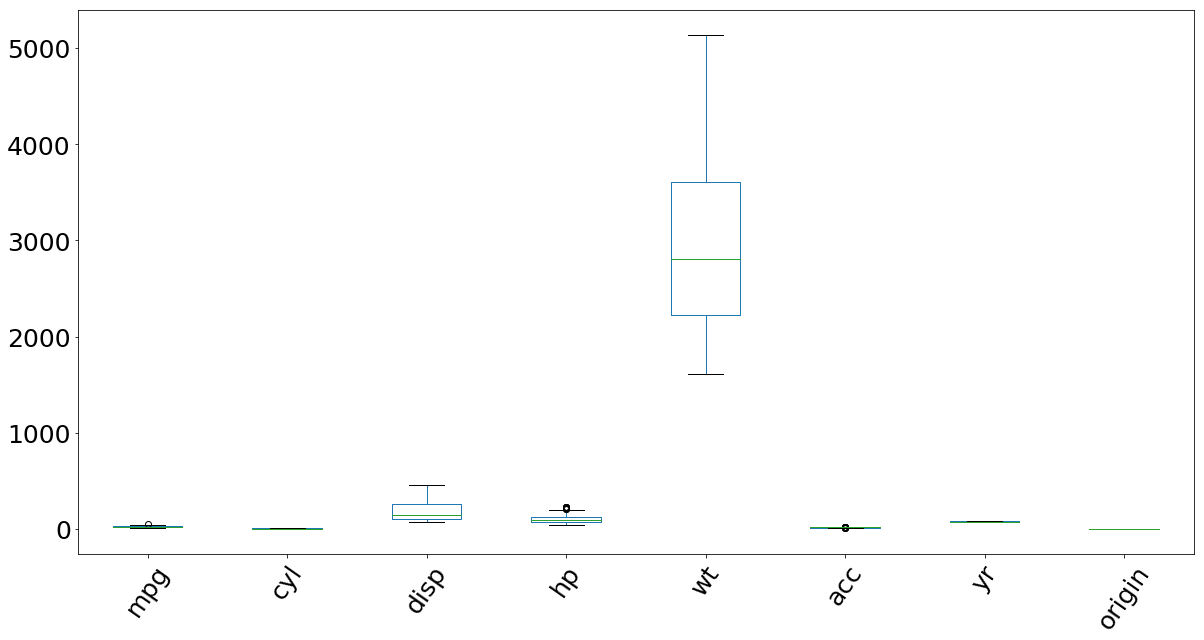

In [130]:
#Using BoxPlot to check Outliers
df.boxplot(figsize=(20,10), grid=False, rot=55, fontsize=25)

In [131]:
#Outliers in hp -- An Other Check

In [132]:
Q3 = df['hp'].quantile(0.75)
Q1 = df['hp'].quantile(0.25)
IQR = Q3-Q1

In [133]:
Q1 - 1.5 * IQR

0.0

In [134]:
Q3 + 1.5 * IQR

200.0

In [135]:
#No Outliers in Hp No value less than (q1-1.5*iqr) and no value greater than (q3 + 1.5 * iqr)

In [136]:
#The Values Imputed by Regressor are not outliers as they are well between 0 and 200.

In [137]:
#.........So not focusing much to  remove them 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B56A876048>,
      dtype=object)

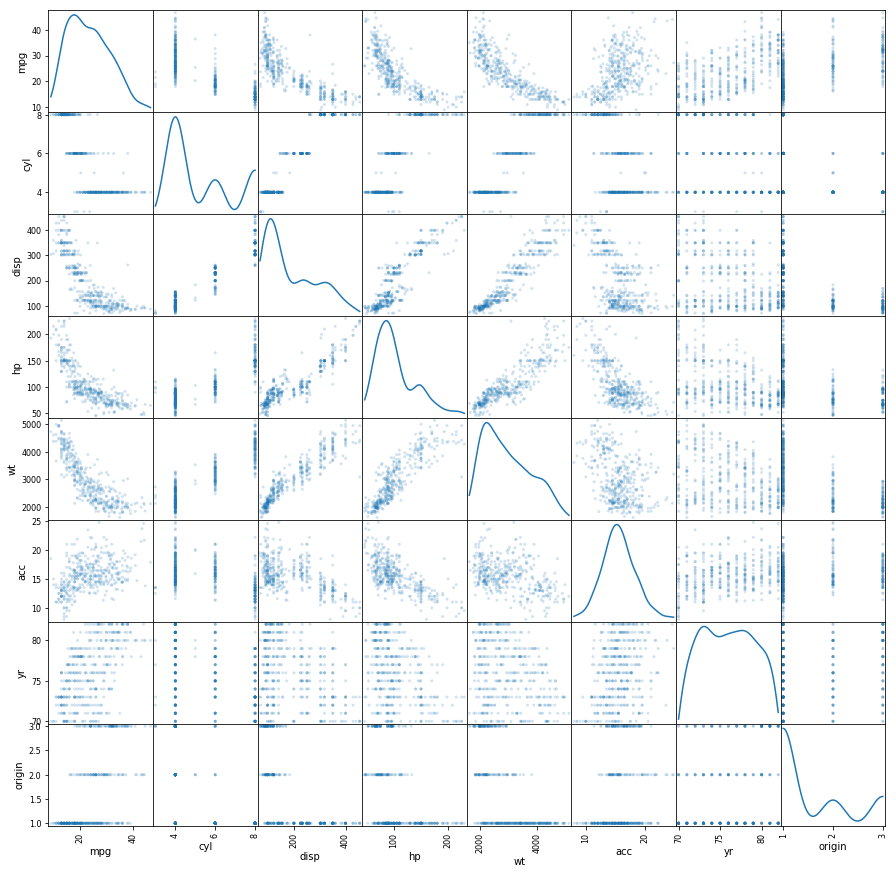

In [138]:
#QUICKY OVERVIEW OF DISTRIBUTIONS OF ALL THE COLUMNS using a Scatter Matrix
scatter_matrix(df, alpha=0.2,figsize=(15,15),diagonal='kde')

In [139]:
#From Distribution plot we can say that, if two features has very similar distrbution ,then we can say 
#example , HP and Displacement has smilar distribution and we can confirm this by below heatmap

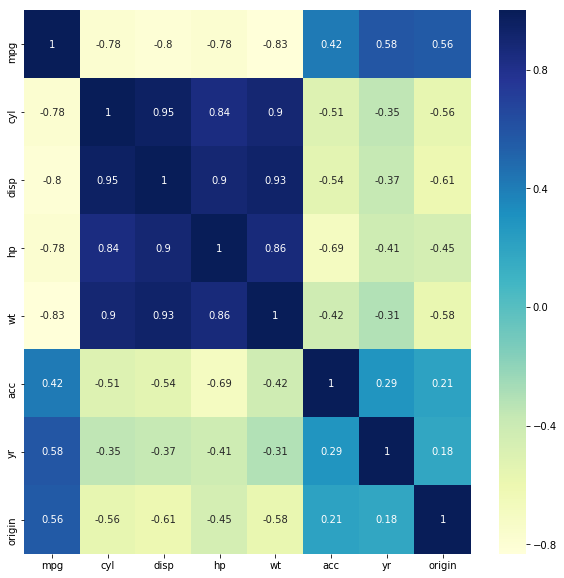

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [140]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

In [141]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

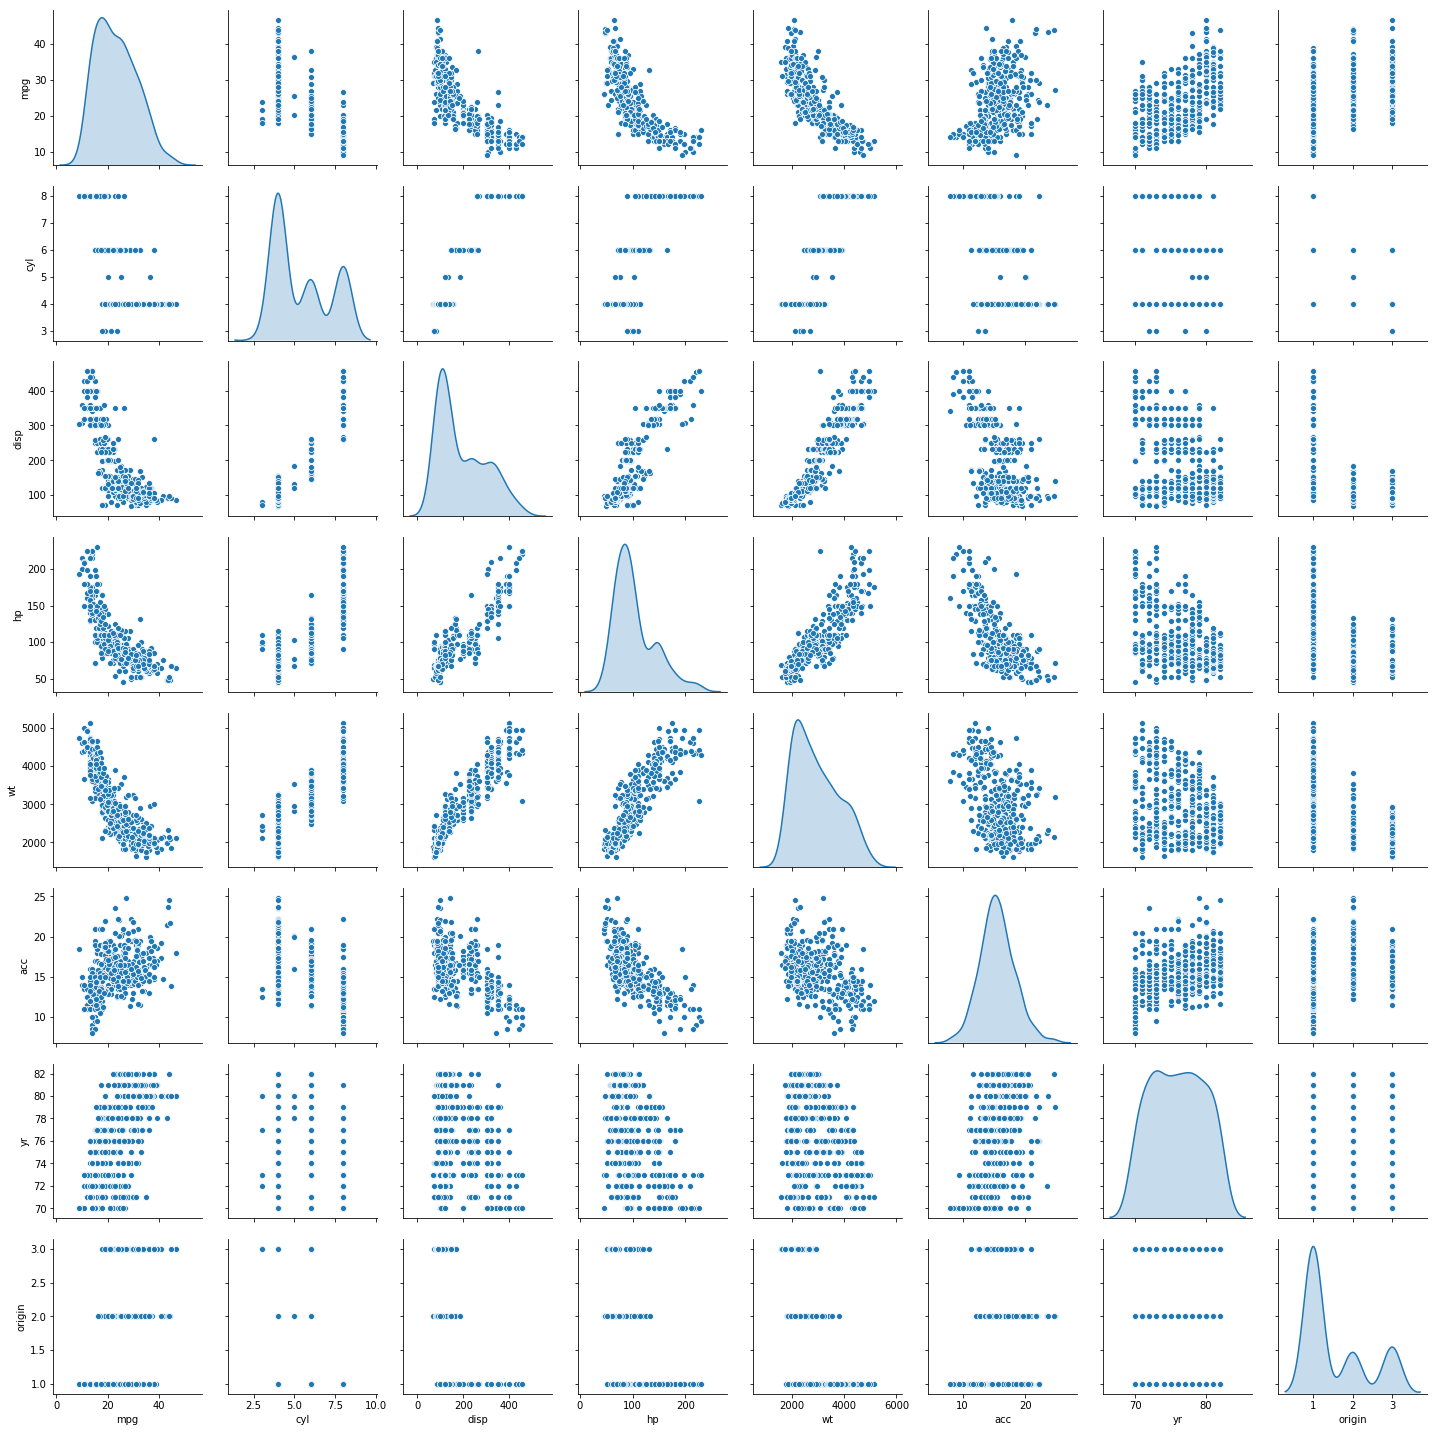

In [50]:
sns.pairplot(df, diag_kind='kde')

In [142]:
#Checking the Distributions of Independent Vaiabls like hp,disp(we can see 3 peaks)...so may be there are 3 natural Clusters

#We cant consider the 3 peaks in cyl colums and cyl is a categorical column and they for that reason form clusters and 
#better not to carried away by categorical variables

#Now can start tuning kmeeans from  clusters=3 and possible may be even 4 proper clusters ....But 3 looks dominant from
#the point of view of distributions.....

In [143]:
#Question 3 -   Idenntify and Seperate data in to Different Clusters

In [144]:
#Using Kmeans Clustering

In [145]:
#Use_Kmean_Clustering is my own rapper function over kmeans to make life easier 

In [146]:
#Clustering is sensitive to Categorical Data -- The Natural Clusters in Categorical Data Can effect Clusters we are finding.
#So Drop the Categorical Variables from the dataset for purpose of Clustering

#df.drop(['origin','yr','cyl'], axis=1)

Number of Clusters   : 4
Homogenity_Score     : 0.20947367560010727
Completeness_Score   : 0.6674556161705003
V_Measure_Score      : 0.31887264465044823
Adjusted_Rand_Score  : 0.038885044014782245
Adjusted_Mutual_Info : 0.1765506915024484
Silhouette_score     : 0.579398469011136




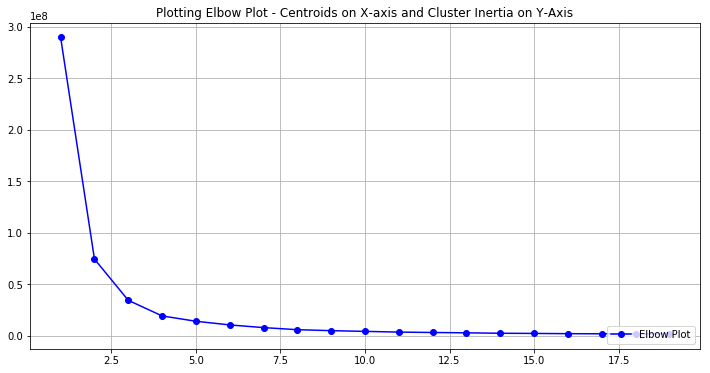

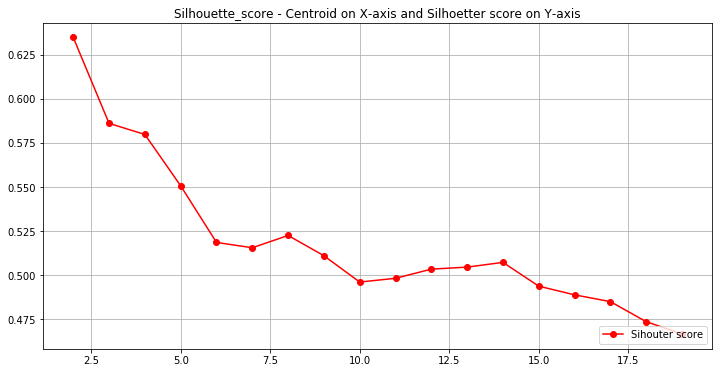

In [147]:
#Have Choosen 4 clusters with reference to the Elbow plot below
Use_Kmean_Clustering(df.drop(['origin','yr','cyl'], axis=1),'mpg', n_clusters=4, plot_elbow=True, plot_sil=True)

In [148]:
#First plot is Elbow plot and Second one is Silhouetter score plotted ...

In [149]:
#From Elbow PLot we can say there are 4 clusters as Cluster-Intertia after the 4th cluster is almost stable and not much reduction.. .
#So might be 4 Clusters is optimal .....we can also make a judgement from plot of silhoutter score , from which I see there might
#be 5 clusters :)......We can check other scores like Homegenity, Completeness, V-Measure ,Adjusted Rand and 
#Adjusted Mutual info to find out how good the clustering is ..

In [150]:
#Homegenity, Completeness and V-Measure are almost equivalent to Precission , Recall and F1-Scores in Classification.
#if we consider each point as a cluster then we can say Homogentiy is 100% and Completeness is Least and other way around
#Homegenity is Least and Completeness is 100% where there is only one Cluster...

#Adjust Rand measure the similarity between labels and assigned clusters (this score ranges between 0 to 1 -where 1 is best)
#Adjusted Mutual Info about how we well we can predict one label by seeing variations in other ...(range 0 to 1 and 1 is best)

In [151]:
#Lets Checkout 5 Clusters ..
Use_Kmean_Clustering(df.drop(['origin','yr','cyl'], axis=1),'mpg', n_clusters=5)

Number of Clusters   : 5
Homogenity_Score     : 0.21869382829635048
Completeness_Score   : 0.6169559492497301
V_Measure_Score      : 0.3229210658748538
Adjusted_Rand_Score  : 0.03020535334981102
Adjusted_Mutual_Info : 0.15328754366437744
Silhouette_score     : 0.5506312436826192




In [152]:
#For Cluster =5 compared to Clusers=4, we can see SilhouetterScore, Adjusted Rand, Adjuste Mutual , Completeness dropped...
#thought there is slight raise in Homegenity .....from this we can Conclude that 4 Clusters are optimal 

In [153]:
#So I have piceked 4 clusters from elbow plot and silhouetter plot and considering other measures like 
#(homegenity, completeness, adjusted rand , adjusted mutual info)

In [154]:
#Just for Fun --Lets see how it will look if we plot all the measures like homegentiy , completeness etc at
#different clusters raning from 2 to 100

In [155]:
#Wrote a helper function with name 'plot_cluster_all' to plot all the scores (code in the starting of notebook)

_____________________________________________________________________________________________________________
    Homogenity, Completeness, Silhouette_score, Adjusted Rand, Adjusted Mutual Info - Plot for 100 Clusters
_____________________________________________________________________________________________________________


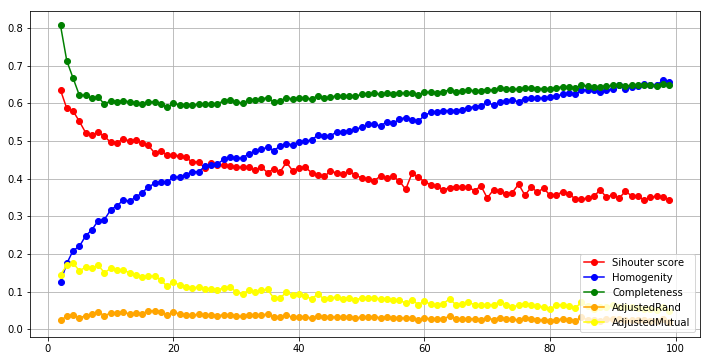

In [75]:
plot_cluster_all(df.drop(['origin','yr','cyl'], axis=1),'mpg', cluster_range=100)

In [156]:
#Just for Info at around 90 clusters we see both Homegentiy and Completeness matches :).....and at 25 clusters both 
#Homegenity and Silhouette Score bombards each other :)

#We can again confirm 4 Clusters from this Plot ...(checkout Completeness and Silhouetter score )...we can see after 4th 
#cluster things are kind of flat :)

In [157]:
##########################################################################################################################

In [158]:
#################### SO FINALLY STICKING TO 4 CLUSTERS :)  #####################################

Number of Clusters   : 4
Homogenity_Score     : 0.20905062186926543
Completeness_Score   : 0.6668513681890921
V_Measure_Score      : 0.31831345241038256
Adjusted_Rand_Score  : 0.03857263778602823
Adjusted_Mutual_Info : 0.17597197743109894
Silhouette_score     : 0.5797888975660482


_____________________________________________________
    Plotting Centroids and Number of Clusters = 4
_____________________________________________________


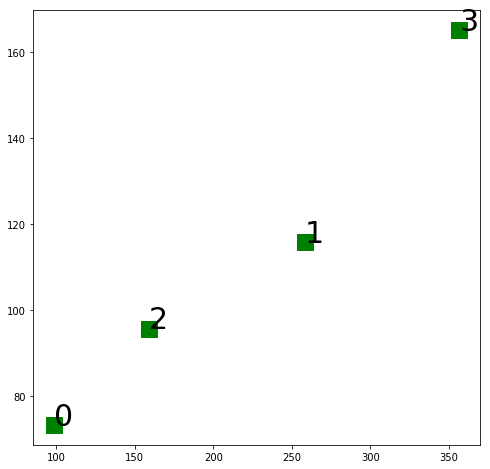

In [159]:
Use_Kmean_Clustering(df.drop(['origin','yr','cyl'], axis=1),'mpg', n_clusters=4, plot_centroids=True)

In [160]:
#Plotted the position of Centroids based on two columns...Just want to see how kmeans has placed the Centroids :)

In [161]:
#Creating a new Column and placing labels predicted by Kmena there
df['label_4'] = pd.Series(kmeans.labels_)

In [162]:
#Lets see a PairPlot with hue equal to kmeans.labels_ so that we might get an Idea on how well the clusters are formed and
#if they mean anything to the features we have 

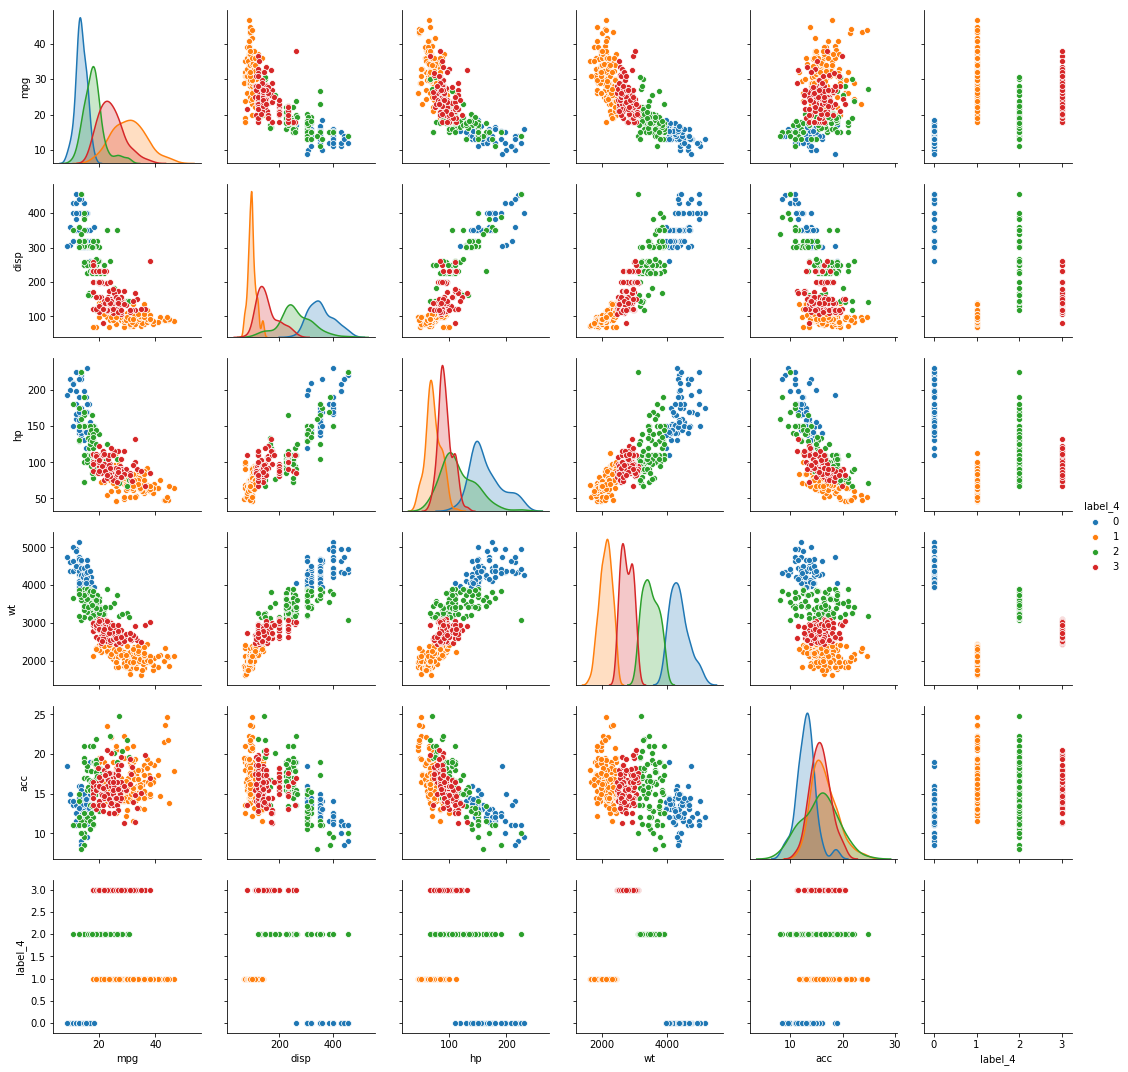

In [83]:
sns.pairplot(df.drop(['origin','yr','cyl'], axis=1), hue='label_4')

In [163]:
#So weight, mpg, displacement , horsepower has clearly distinguishable distributions with respect to kmeans.labels_ so 
#we can conclude with some certanity that the clustering went well .....

In [164]:
#Just for comaprison ....Lets use Chi2 to compare two categorical columns
#'Origin' and 'label_4'(which is nothing but clusters predictd by kmeans)

#since 'origin' and label_4 are categorical columns , I cant use a persons test i.e df.corr()
#to check how correlated they are .....

#stats_corr_cat is my own function which is a wraper on top of 'stats.chi2_contingency'
stats_corr_cat(df, 'origin', 'label_4')

Correlation using Stats Chi2
(152.1523061638727, 2.712874329222639e-30, 6, array([[88.21356784, 54.42964824, 63.18844221, 43.16834171],
       [24.79899497, 15.30150754, 17.7638191 , 12.13567839],
       [27.98743719, 17.26884422, 20.04773869, 13.6959799 ]]))


In [165]:
#since pvalue 4.481286506770059e-30  very less compared to 0.05 ...we can say the origin and
#clusters given by kmeans are higly correlated to each other and this may be an other test to 
#see how good our clustering is ..............

In [166]:
#Since we derived the 4 clusters without 'origin' column its a good sign that origin and the cluster by kmenas are in 
#correlation ...Just in this scenario, its an oppurtunity to see if clustering makes any sense

In [167]:
#########################################################################################################

In [168]:
######################## CLUSTERING USING ---- Hierachial Clustering ##################################

In [169]:
#What is the difference between Hierarchial and Kmeans clustering schemes ?

#Hierarchial clustering is 'connectivity-based' clustering based on idea that points are connected to points close by
#rather than further away

#Kmeans is a centroid based algorithm which partitions the dataset but Hierarchial Clustering constructs a tree of
#points which are merged together

#In Kmeans Data has to be represented as VECTORS in N-Dimnensional hyperspace and in Hierarchial there is no need to
#represent data as vectors(so Hierarchial makes life easy while dealing with complex data like : graphs , docs etc)

#Kmeans can efficiently deal with very large datasets and Hierachial is too computationally expensive for large datasets.


In [170]:
#Hierarchial Clustering(Agglomerative) is a Bottom Up Approach i.e it starts considering each datapoint as a cluster and trying 
#clustering them till all the datapoints fall in to a single cluster and we can visualize this using an dendogram....
#On the Other hand (Divisive) method start with 1 big cluster and ends with many 1-point clusters..

#Here we are focusing on Agglomerative.......

#Picking Agglomerative Clustering ....
#Since it need to cluster smaller clusters to larger one, Linkage Method plays a major role.
#Linkag criterion determines the distance to be minimized when merging clusters.


#Lets see the dendogram for the all the 'linkage_methods' like single, complete, average and ward 

coph_distance : 0.5782658574974653


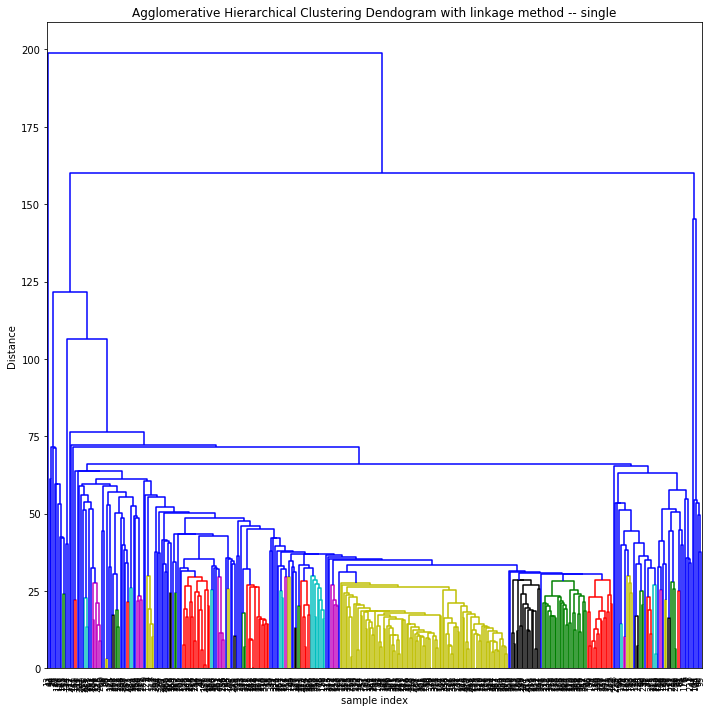

In [92]:
plot_dendogram(df.drop(['origin','yr','cyl'], axis=1), 'single')

coph_distance : 0.7782889685712104


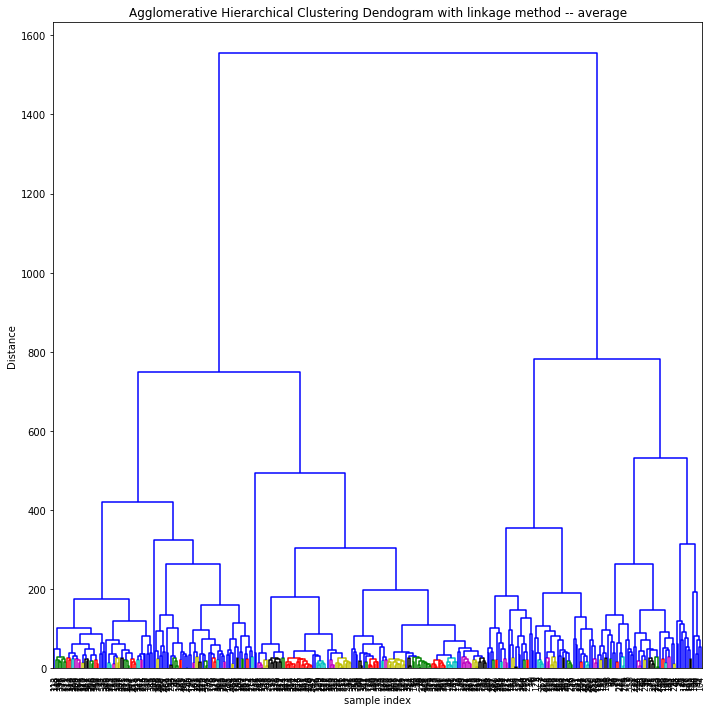

In [93]:
#Plot_dendogram is my own helper function and code for all the helper functions has been places in the starting of notebook.
plot_dendogram(df.drop(['origin','yr','cyl'], axis=1), 'average')

coph_distance : 0.790144437675177


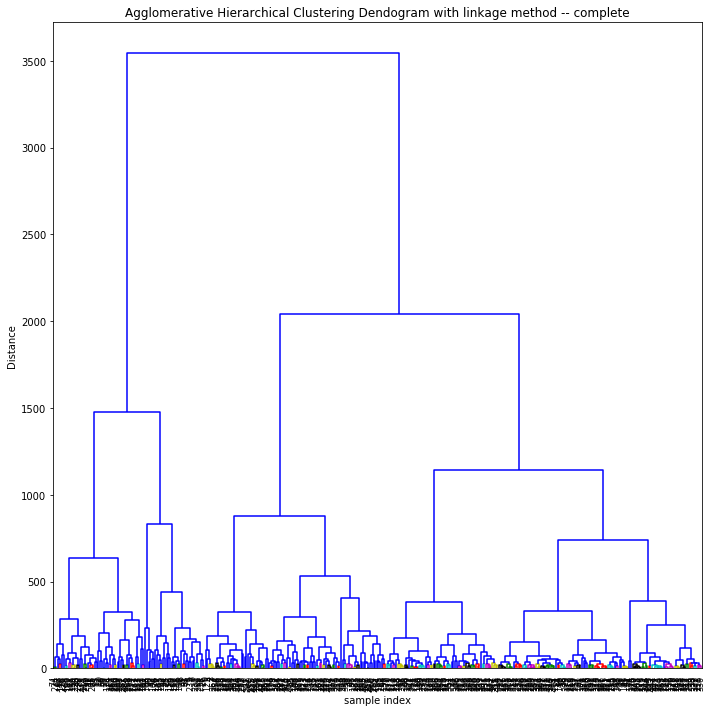

In [94]:
plot_dendogram(df.drop(['origin','yr','cyl'], axis=1), 'complete')

In [321]:
#Selecting ward method for Linkage as Dendogram looks cleaner and cleary there are 4 clusters each with 2 sub clusters

coph_distance : 0.7739392808275118


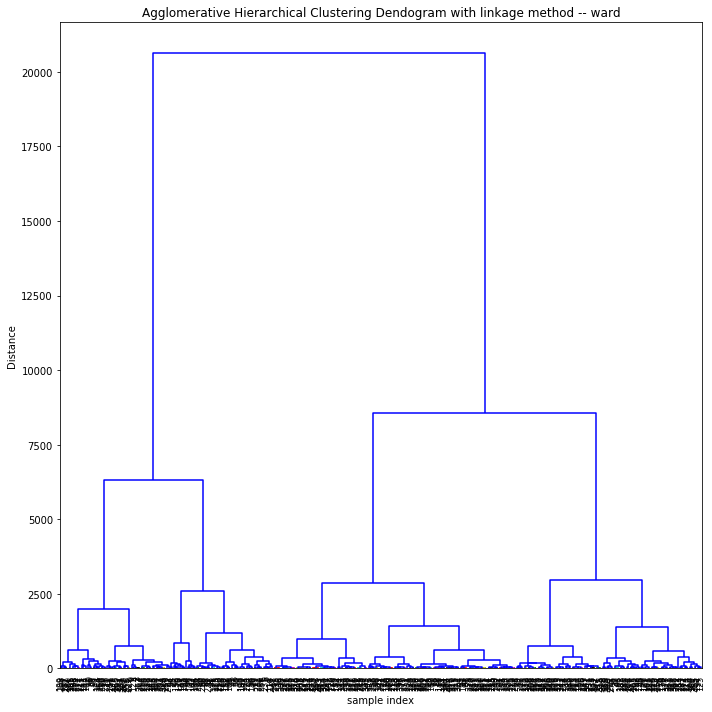

In [95]:
plot_dendogram(df.drop(['origin','yr','cyl'], axis=1), 'ward')

In [171]:
#We know Ward method is better from Dendogram ...But also want to check practically 
#So using Manhattan distance with Average linkage...
Use_Agglomerative_Clustering(df.drop(['origin','yr','cyl'], axis=1), 'mpg', n_clusters=4, affinity='manhattan', linkage='average')

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func='deprecated')


Number of Clusters   : 4
Homogenity_Score     : 0.1565764644503702
Completeness_Score   : 0.715364294475195
V_Measure_Score      : 0.2569193167686783
Adjusted_Rand_Score  : 0.01956511661107484
Adjusted_Mutual_Info : 0.14667588008678942
Silhouette_score     : 0.3808769653985651




AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func='deprecated')


Number of Clusters   : 4
Homogenity_Score     : 0.19934677657261757
Completeness_Score   : 0.6501340285603608
V_Measure_Score      : 0.3051325519083153
Adjusted_Rand_Score  : 0.03421702472207119
Adjusted_Mutual_Info : 0.1621384081709958
Silhouette_score     : 0.5680552537639225




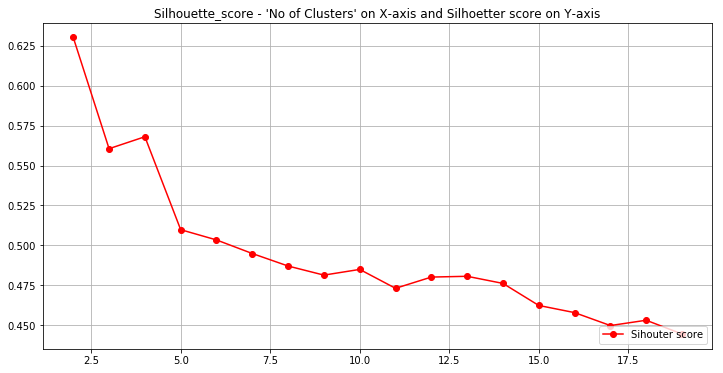

In [172]:
#Lets Perform Agglomerative Clusering with Linkate-method : ward
#Default method in Agglomerative Clustering is -- Ward 

#Use_Agglomerative is my own helper function on top of AgglomerativeClustering.
Use_Agglomerative_Clustering(df.drop(['origin','yr','cyl'], axis=1), 'mpg', n_clusters=4, plot_sil=True)

In [85]:
####ITS Clear that the 'ward' method is doig better than average and from dendogram ward should do better than all other
#Linkage methods

In [86]:
#After 4th Cluster there is very small change occuring for consecutive clusters .....so 4 is optimal cluster number.

In [87]:
#Kmenas Scores
#_____________________________________________________________________________
#Number of Clusters   : 4
#Homogenity_Score     : 0.2103852631320211
#Completeness_Score   : 0.670789973289342
#V_Measure_Score      : 0.3203093305479964
#Adjusted_Rand_Score  : 0.03893082941889128
#Adjusted_Mutual_Info : 0.17833950070518143
#Silhouette_score     : 0.5796383975182029

#Agglomerative Scores
#______________________________________________________________________________
#Number of Clusters   : 4
#Homogenity_Score     : 0.19934677657261757
#Completeness_Score   : 0.6501340285603608
#V_Measure_Score      : 0.3051325519083153
#Adjusted_Rand_Score  : 0.03421702472207119
#Adjusted_Mutual_Info : 0.1621384081709958
#Silhouette_score     : 0.5680552537639225


#Looks Like KMEANS is the winner over Agglomerative in this scenario :)

In [88]:
#KMEANS vs Agglomerative -------------------KMEANS is the Winner 

In [89]:
########################################## 4th Question - 2nd Part    ######################################################
#Use Linear Regression model on different clusters seperately and print the coefficents of models individually 

In [173]:
df.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,label_4
0,18.0,8,307.0,130,3504,12.0,70,1,1
1,15.0,8,350.0,165,3693,11.5,70,1,1
2,18.0,8,318.0,150,3436,11.0,70,1,1
3,16.0,8,304.0,150,3433,12.0,70,1,1
4,17.0,8,302.0,140,3449,10.5,70,1,1
5,15.0,8,429.0,198,4341,10.0,70,1,3
6,14.0,8,454.0,220,4354,9.0,70,1,3
7,14.0,8,440.0,215,4312,8.5,70,1,3
8,14.0,8,455.0,225,4425,10.0,70,1,3
9,15.0,8,390.0,190,3850,8.5,70,1,1


In [174]:
df['label_4'].value_counts()

0    141
2    101
1     87
3     69
Name: label_4, dtype: int64

In [175]:
df0 = df.loc[df['label_4'] == 0,]
df1 = df.loc[df['label_4'] == 1,]
df2 = df.loc[df['label_4'] == 2,]
df3 = df.loc[df['label_4'] == 3,]

In [176]:
#Applying Lasso on category 0  ---- 
#(alpha = 0 , then it will be euql to linear regression , but here alpha=2 is giving better result)
Use_Lasso(df0, 0, 'mpg', max_iter=100000, alpha=2)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Training Accuracy : 0.6497242590504018
Testing Accuracy  : 0.5713243718803287
Testing MeanSquareError :20.163504910339057




In [177]:
#Applying Lasso on category 1  ---- 
Use_Lasso(df1, 0, 'mpg', max_iter=100000, alpha=2)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Training Accuracy : 0.4612479144002569
Testing Accuracy  : 0.6375329737295495
Testing MeanSquareError :2.962217023179667




In [178]:
#Applying Lasso on category 2  ---- 
Use_Lasso(df2, 0, 'mpg', max_iter=100000, alpha=2)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Training Accuracy : 0.5440402455326336
Testing Accuracy  : 0.6796117212511552
Testing MeanSquareError :4.454588541223792




In [179]:
#Applying Lasso on category 3  ---- 
Use_Lasso(df3, 0, 'mpg', max_iter=100000, alpha=2)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Training Accuracy : 0.426488523565271
Testing Accuracy  : 0.2141774681556906
Testing MeanSquareError :2.7178233565643892




In [180]:
Use_Lasso(df, 0, 'mpg', max_iter=1000, alpha=0.2)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Training Accuracy : 0.8245688777268669
Testing Accuracy  : 0.7925959290343959
Testing MeanSquareError :12.683795635832656




In [181]:
#The Accuray with full dataset > than the accuracy with clusteres ......(This could be because of the size of the data)
#Clusters have fewer rows to train and that could be the reason for a lower accuracy 


#I have been experimenting on how to use these Clusters to make my model better


#1) How about combining these Clusters back to one dataset and train on that Dataset ? (Will it imporove my accuracy ?)
#2) MAY BE CLUSTERS CAN BE USED AS "TESTING DATA TOO".(Testing this way we can make the model more robust)

In [182]:
#########################################################################################################################
#1 ---------------------------------#Combining Clusters Back to a dataframe named df_combined
#########################################################################################################################

In [183]:
#Combining Clusters to a SingleDataset
df_combined = pd.concat([df3, df2, df1, df0])

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Training Accuracy : 0.8173648434143533
Testing Accuracy  : 0.8265531497201275
Testing MeanSquareError :9.786822811370616


Plotting Training and Testing Accuracy(How Closely Testing Curve follows Training Curve)



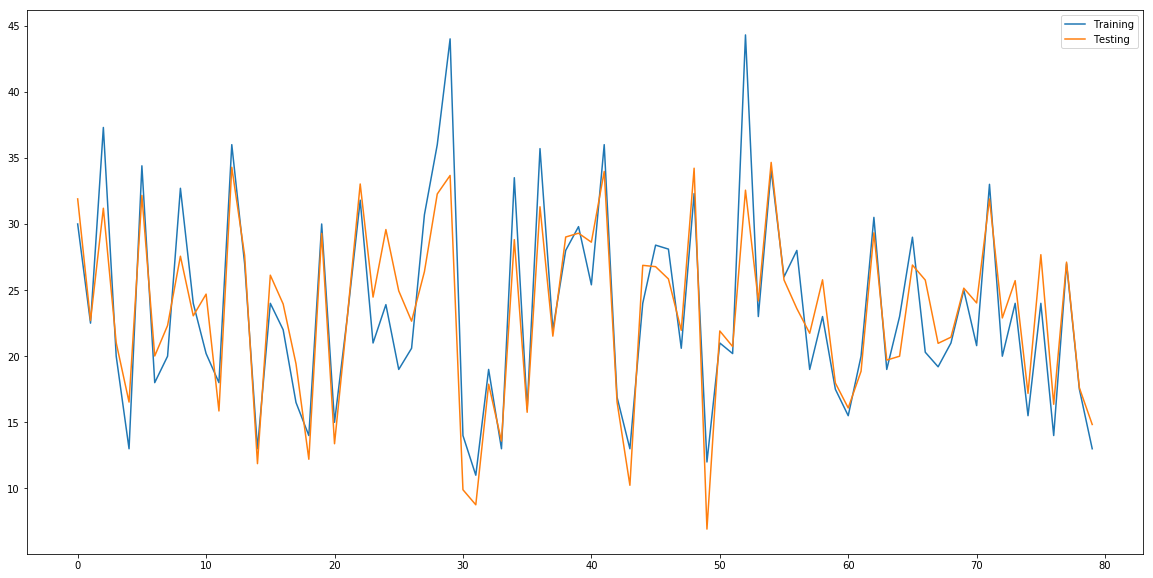

In [184]:
Use_Lasso(df_combined, 0, 'mpg', max_iter=1000, alpha=0.2, plot=True)

In [185]:
model_lasso = model

In [186]:
#Dataset formed by Combining Clusters performs similar to theoriginal dataset

#Original Dataset
    #Training Accuracy : 0.8438074598164351
    #Testing Accuracy  : 0.8175654440586463
    #Testing MeanSquareError :11.15678498353949
    
#Dataset formed by Combining Clusters
    #Training Accuracy : 0.8195799721484572
    #Testing Accuracy  : 0.8215533575372822
    #Testing MeanSquareError :11.166632960736305


In [187]:
#########################################################################################################################
#2 -----------------------------------#Using Clusters as TestData and Training FullDataset with RandomforestRegressor
#########################################################################################################################

<class 'pandas.core.frame.DataFrame'>
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=2,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
Training Accuracy : 0.8917402525961632
Testing Accuracy  : 0.9129717911040904
Testing MeanSquareError :4.903267059948979




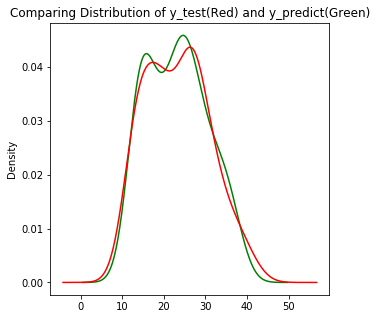

In [188]:
#Running a RandomForestRegressor and want to use this model on Clusters(as test data)
Use_RandomForestReg(df, 0, 'mpg',criterion='mae',max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=14, n_jobs=2, plot_simple=True)

In [189]:
#Using Cluster 1 to test the model created by RandomForestRegressor
model

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=2,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [192]:
#Testing RandomForestRegressor on Clusters(as test Data)
r2_score(model.predict(df1.drop('mpg', axis=1)), df1['mpg'])

0.6379848680028041

In [193]:
#Testing LassoLinearRegressor on Clusters(as test Data)
r2_score(model_lasso.predict(df1.drop('mpg', axis=1)), df1['mpg'])

0.0605798819237412

In [194]:
#We can see that Lasso Performs Great on any part of the data but its not workign great on Clustered Data
r2_score(model_lasso.predict(df[2:50].drop('mpg', axis=1)), df[2:50]['mpg'])

0.8224555547315453

In [195]:
##############################################################################################
#Even the accuracy looks ok for Lasso its performance on Clusters(as test data) is worst ...
#But RandomforestRegressor performs ok ...So Clusters can be used as Testing Data to put the Model to its hardest Test :)
#Hope this will make the model more ready for Production data
###############################################################################################

In [196]:
#Optional Question ---- Check if 'car_name' can be used as a feature for analysys......

In [197]:

#Bringing back old DataSet.....

df['car_name'] = pd.read_csv("new-car-mpg .csv", usecols=['car_name'])
df['origin'] = pd.read_csv("new-car-mpg .csv", usecols=['origin'])
del(df['label_4'])

In [198]:
df.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [199]:
def change_car_name(x):
    return x.split()[0]

In [200]:
df['car_name'] = df['car_name'].apply(change_car_name)

In [201]:
df.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford
5,15.0,8,429.0,198,4341,10.0,70,1,ford
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac
9,15.0,8,390.0,190,3850,8.5,70,1,amc


In [202]:
df['car_name'].value_counts()

ford             51
chevrolet        43
plymouth         31
dodge            28
amc              28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
fiat              8
peugeot           8
audi              7
volvo             6
vw                6
chrysler          6
renault           5
opel              4
subaru            4
saab              4
chevy             3
cadillac          2
maxda             2
mercedes-benz     2
bmw               2
triumph           1
nissan            1
mercedes          1
capri             1
chevroelt         1
vokswagen         1
hi                1
toyouta           1
Name: car_name, dtype: int64

In [203]:
df['car_name'] = LabelEncoder().fit_transform(df['car_name'])

In [204]:
df.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,7
1,15.0,8,350.0,165,3693,11.5,70,1,3
2,18.0,8,318.0,150,3436,11.0,70,1,25
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,13
5,15.0,8,429.0,198,4341,10.0,70,1,13
6,14.0,8,454.0,220,4354,9.0,70,1,7
7,14.0,8,440.0,215,4312,8.5,70,1,25
8,14.0,8,455.0,225,4425,10.0,70,1,26
9,15.0,8,390.0,190,3850,8.5,70,1,0


<class 'pandas.core.frame.DataFrame'>
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=2,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
Training Accuracy : 0.9046254803570105
Testing Accuracy  : 0.9029961677453463
Testing MeanSquareError :5.4653048869699905




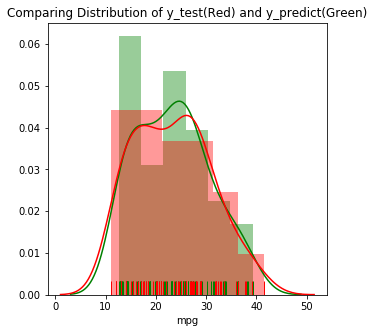

In [205]:
Use_RandomForestReg(df, 0, 'mpg', criterion='mse', max_depth=6, min_samples_leaf=8,n_estimators=11, n_jobs=2, plot=True)

In [206]:
#Can see a very sligh improvement because addition of the car_name column .....